In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
orders_data=pd.read_csv("orders_2016-2020_Dataset (1).csv")
reviews_data=pd.read_csv("review_dataset (1).csv")

In [3]:
orders_data.head(10)

,Order #,Order Date and Time Stamp,Fulfillment Status,Payment Status,Payment Date and Time Stamp,Fulfillment Date and Time Stamp,Currency,Subtotal,Shipping Method,Shipping Cost,...,Payment Method,Tracking #,Special Instructions,LineItem Name,LineItem SKU,LineItem Options,LineItem Add-ons,LineItem Qty,LineItem Sale Price,LineItem Type
0,R929392577,09-11-2020 20:36:26 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical
1,R653462960,09-11-2020 20:18:26 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Samsung U Flex Wireless Bluetooth Flexible Hea...,PL000032123,NaN,NaN,1,₹ 699.00,physical
2,R226302759,09-11-2020 19:56:21 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical
3,R390235057,09-11-2020 19:37:40 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 599.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,JBL Tempo On-Ear Headphone,PL000157,NaN,NaN,1,₹ 599.00,physical
4,R813855117,09-11-2020 18:35:47 +0530,Cancelled,Paid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Mi Neckband Bluetooth Headset with Mic (Black),PL000041332,NaN,NaN,1,₹ 699.00,physical
5,R754638660,09-11-2020 16:56:27 +0530,Cancelled,Paid,NaN,NaN,INR,₹ 999.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,boAT Airdopes X3 Bass Wireless Earbuds with Ch...,PL0009821,NaN,NaN,1,₹ 999.00,physical
6,R513882916,09-11-2020 16:18:12 +0530,Cancelled,Paid,NaN,NaN,INR,₹ 999.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,boAT Airdopes X3 Bass Wireless Earbuds with Ch...,PL0009821,NaN,NaN,1,₹ 999.00,physical
7,R224377947,09-11-2020 16:10:15 +0530,Cancelled,Paid,NaN,NaN,INR,₹ 999.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,boAT Airdopes X3 Bass Wireless Earbuds with Ch...,PL0009821,NaN,NaN,1,₹ 999.00,physical
8,R159044399,09-11-2020 15:21:55 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Boat Rockerz 255 Wireless Bluetooth Headset wi...,PL091200,NaN,NaN,1,₹ 799.00,physical
9,R582285083,09-11-2020 14:09:57 +0530,Cancelled,Paid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical


In [4]:
null_percent=pd.DataFrame()
percent=[]
columns=[]
for i in orders_data.columns:
    columns.append(i)
    per=(orders_data[i].isnull().sum()/len(orders_data[i]))*100
    percent.append(per)
null_percent['Columns']=columns
null_percent['Percentage']=percent
print(null_percent)

                            Columns  Percentage
0                           Order #    0.000000
1         Order Date and Time Stamp    0.000000
2                Fulfillment Status    0.000000
3                    Payment Status    0.000000
4       Payment Date and Time Stamp   89.551589
5   Fulfillment Date and Time Stamp   90.030475
6                          Currency    0.000000
7                          Subtotal    0.000000
8                   Shipping Method    0.000000
9                     Shipping Cost    0.000000
10                       Tax Method   99.956465
11                            Taxes    0.000000
12                            Total    0.000000
13                      Coupon Code   93.164998
14                 Coupon Code Name   93.164998
15                         Discount    0.000000
16                     Billing Name   85.633435
17                  Billing Country   85.633435
18           Billing Street Address   85.633435
19         Billing Street Address 2   91

In [5]:
orders=orders_data.copy()

In [6]:
orders.drop(['Tax Method','Coupon Code','Coupon Code Name','Gift Cards','Tracking #'],axis=1,inplace=True)

In [7]:
orders.drop('Special Instructions',axis=1,inplace=True)

In [8]:
orders['Payment Date and Time Stamp'].fillna('Nil',inplace=True)

In [9]:
null=pd.DataFrame()
percentage=[]
col=[]
for i in orders.columns:
    col.append(i)
    per=(orders[i].isnull().sum()/len(orders[i]))*100
    percentage.append(per)
null['Columns']=col
null['Percentage']=percentage
print(null)

                            Columns  Percentage
0                           Order #    0.000000
1         Order Date and Time Stamp    0.000000
2                Fulfillment Status    0.000000
3                    Payment Status    0.000000
4       Payment Date and Time Stamp    0.000000
5   Fulfillment Date and Time Stamp   90.030475
6                          Currency    0.000000
7                          Subtotal    0.000000
8                   Shipping Method    0.000000
9                     Shipping Cost    0.000000
10                            Taxes    0.000000
11                            Total    0.000000
12                         Discount    0.000000
13                     Billing Name   85.633435
14                  Billing Country   85.633435
15           Billing Street Address   85.633435
16         Billing Street Address 2   91.423596
17                     Billing City   85.633435
18                    Billing State   85.981715
19                      Billing Zip   85

In [10]:
nil_payments = orders[orders['Payment Date and Time Stamp'] == 'Nil']
list=['Billing Country','Billing Name','Billing Street Address','Billing Street Address 2','Billing City','Billing State','Billing Zip','Shipping Name','Shipping Country','Shipping Street Address','Shipping Street Address 2','Shipping City','Shipping State','Shipping Zip','Fulfillment Date and Time Stamp','Shipping Method','Shipping Cost','Payment Method']
if not nil_payments.empty:
    for i in list:
        orders.loc[orders['Payment Date and Time Stamp'] == 'Nil', i] = 'Payment not Done'

In [11]:
address_different=orders[orders['Shipping Street Address']!=orders['Billing Street Address']]
orders_with_address_different=address_different['Order #']
address_same=orders[orders['Shipping Street Address']==orders['Billing Street Address']]
orders_with_same_address=address_same['Order #']

In [12]:
no_different=len(orders_with_address_different)
no_same=len(orders_with_same_address)
data=[no_different,no_same]
labels=['No: of orders with different addresses','No: of orders with same addresses']

In [13]:
#2Multipleorders of same item

multiple_orders = orders.groupby(['LineItem Name']).size().reset_index(name="Count")

In [14]:
#3Unsually large orders
orders['LineItem Qty'].unique()

array([  1,   2, 999,   5,   8,  20,  10, 100,   3,  13,   4,  15,  12,
        16,  22,  24,  50,   6,  30,  55,   9,  27,  25,  93], dtype=int64)

In [15]:
label=[]
for i in orders[orders['LineItem Qty']>10]['LineItem Name']:
    label.append(i)
data=[]
for i in orders[orders['LineItem Qty']>10]['LineItem Qty']:
    data.append(i)

In [16]:
#4Multiple orders to the same address with different payment method.
pm=[]
paymentmethod=[]
for i in orders['Payment Method']:
      pm.append(i)
for i in pm:
    x=i.split()[0]
    paymentmethod.append(x)

orders['Payment']=paymentmethod
orders['Payment']=orders['Payment'].replace('Payment','No Payment')
orders

,Order #,Order Date and Time Stamp,Fulfillment Status,Payment Status,Payment Date and Time Stamp,Fulfillment Date and Time Stamp,Currency,Subtotal,Shipping Method,Shipping Cost,...,Shipping Zip,Payment Method,LineItem Name,LineItem SKU,LineItem Options,LineItem Add-ons,LineItem Qty,LineItem Sale Price,LineItem Type,Payment
0,R929392577,09-11-2020 20:36:26 +0530,Unfulfilled,Unpaid,Nil,Payment not Done,INR,₹ 799.00,Payment not Done,Payment not Done,...,Payment not Done,Payment not Done,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical,No Payment
1,R653462960,09-11-2020 20:18:26 +0530,Unfulfilled,Unpaid,Nil,Payment not Done,INR,₹ 699.00,Payment not Done,Payment not Done,...,Payment not Done,Payment not Done,Samsung U Flex Wireless Bluetooth Flexible Hea...,PL000032123,NaN,NaN,1,₹ 699.00,physical,No Payment
2,R226302759,09-11-2020 19:56:21 +0530,Unfulfilled,Unpaid,Nil,Payment not Done,INR,₹ 799.00,Payment not Done,Payment not Done,...,Payment not Done,Payment not Done,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical,No Payment
3,R390235057,09-11-2020 19:37:40 +0530,Unfulfilled,Unpaid,Nil,Payment not Done,INR,₹ 599.00,Payment not Done,Payment not Done,...,Payment not Done,Payment not Done,JBL Tempo On-Ear Headphone,PL000157,NaN,NaN,1,₹ 599.00,physical,No Payment
4,R813855117,09-11-2020 18:35:47 +0530,Cancelled,Paid,Nil,Payment not Done,INR,₹ 699.00,Payment not Done,Payment not Done,...,Payment not Done,Payment not Done,Mi Neckband Bluetooth Headset with Mic (Black),PL000041332,NaN,NaN,1,₹ 699.00,physical,No Payment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,R243395005,05-10-2016 04:17:45 +0530,Cancelled,Unpaid,Nil,Payment not Done,INR,₹ 50.00,Payment not Done,Payment not Done,...,Payment not Done,Payment not Done,Ear Wired Earphones With Mic White,11,NaN,NaN,1,₹ 50.00,physical,No Payment
2293,R607209508,03-10-2016 15:10:47 +0530,Cancelled,Unpaid,Nil,Payment not Done,INR,₹ 500.00,Payment not Done,Payment not Done,...,Payment not Done,Payment not Done,I Kall K-66 White,9,NaN,NaN,1,₹ 500.00,physical,No Payment
2294,R140316623,29-09-2016 18:33:27 +0530,Cancelled,Unpaid,Nil,Payment not Done,INR,"₹ 4,000.00",Payment not Done,Payment not Done,...,Payment not Done,Payment not Done,Electric Steam Cooker Maestro MC1,1,NaN,NaN,2,"₹ 2,000.00",physical,No Payment
2295,R192037084,28-09-2016 18:59:22 +0530,Cancelled,Unpaid,Nil,Payment not Done,INR,"₹ 2,000.00",Payment not Done,Payment not Done,...,Payment not Done,Payment not Done,Electric Steam Cooker Maestro MC1,1,NaN,NaN,1,"₹ 2,000.00",physical,No Payment


In [18]:
grouped_data = orders.groupby(['Shipping Street Address', 'Payment']).size().reset_index(name='Count')
grouped_data_greaterthan1=pd.DataFrame(grouped_data[grouped_data['Count']>1])

In [19]:
#5 Unexpected international orders.
orders['Shipping State'].unique()
#there are no international orders 

array(['Payment not Done', 'IN-TN', 'IN-MH', 'IN-UT', 'IN-PY', 'IN-UP',
       'IN-CT', 'IN-AP', 'IN-GA', 'IN-JH', 'IN-KA', 'IN-WB', 'IN-AN',
       'IN-MP', 'IN-DL', 'IN-JK', 'IN-RJ', 'IN-BR', 'IN-TG', 'IN-GJ',
       'IN-PB', 'IN-KL', 'IN-HR', 'IN-CH', 'IN-AS', 'IN-OR', 'IN-HP'],
      dtype=object)

In [20]:
country=[]
for i in orders['Shipping State']:
    x=i.split("-")[0]
    country.append(x)
orders['Country']=country
country_count=[]
# for i in orders['Country']
# orders['Country'].unique()

In [25]:

import matplotlib.backends.backend_pdf as pdf
import pandas as pd

df_plots = pd.DataFrame()
pdf_pages = pdf.PdfPages(pdf_filename)
def save_plot_to_pdf(plot):
    pdf_pages.savefig(plot)

NameError: name 'pdf_filename' is not defined

Enter the option you want : 
1.The shipping address differs from the billing address 
2.Multiple orders of the same item. 
3.Unusually large orders. 
4.4.Multiple orders to the same address with different payment method. 
5.Unexpected international orders.
6.Generate pdf and csv file2


NameError: name 'save_plot_to_pdf' is not defined

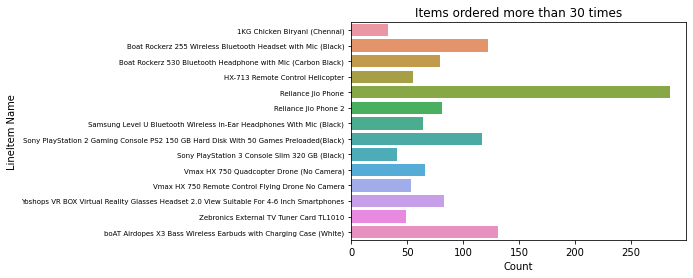

In [33]:
x=input("Enter the option you want : \n1.The shipping address differs from the billing address \n2.Multiple orders of the same item. \n3.Unusually large orders. \n4.4.Multiple orders to the same address with different payment method. \n5.Unexpected international orders.\n6.Generate pdf and csv file")
if(x=="1"):
    plt.pie(data,labels=labels,autopct='%1.0f')
    plt.title("Distribution of possible fake and real order based on the billing and shipping address")
    save_plot_to_pdf(plt.gcf())
    plt.savefig('Distribution of possible fake and real order based on the billing and shipping address.png')
    df_plots['Plot'] = ['Distribution of possible fake and real order based on the billing and shipping address.png']
    plt.show()
    plt.close()
    
elif(x=='2'):
    sns.barplot(y=multiple_orders[multiple_orders['Count']>30]['LineItem Name'], x=multiple_orders['Count'])
    plt.yticks(fontsize=7)
    plt.title("Items ordered more than 30 times")
    save_plot_to_pdf(plt.gcf())
    plt.savefig('Items ordered more than 30 times.png')
    df_plots['Plot'] = ['Items ordered more than 30 times.png']
    plt.show()
    plt.close()
elif (x=='3'):
    print(orders[orders['LineItem Qty']>10]['LineItem Name'])
    patches, texts = plt.pie(data)
    plt.legend(patches, label,bbox_to_anchor=(0.9,1), loc="upper left")
    plt.title("The distribution of sales in which more than 10 items have been bought at once")
    save_plot_to_pdf(plt.gcf())
    plt.savefig('The distribution of sales in which more than 10 items have been bought at once.png')
    df_plots['Plot'] = ['The distribution of sales in which more than 10 items have been bought at once.png']
    plt.show()
    plt.close()
elif(x=='4'):
    plt.title("Shipping Address for multiple Orders with different payment methods")
    plt.pie(grouped_data_greaterthan1['Shipping Street Address'].value_counts(),labels=grouped_data_greaterthan1['Shipping Street Address'])
    save_plot_to_pdf(plt.gcf())
    plt.savefig('Shipping Address for multiple Orders with different payment methods.png')
    df_plots['Plot'] = ['Shipping Address for multiple Orders with different payment methods.png']
    plt.show()
    plt.close()
    plt.title("Shipping Address which have more than 1 payment methods for multiple orders")
    sns.countplot(grouped_data['Count'])
    save_plot_to_pdf(plt.gcf())
    plt.savefig('Shipping Address which have more than 1 payment methods for multiple orders.png')
    df_plots['Plot'] = ['Shipping Address which have more than 1 payment methods for multiple orders.png']
    plt.show()
    plt.close()
elif (x=='5'):
    orders['Shipping State'].unique()
    print("There are no International Orders")
    plt.title("Country Distribution")
    plt.pie(orders['Country'].value_counts(),labels=orders['Country'].unique())
    save_plot_to_pdf(plt.gcf())
    plt.savefig('Country Distribution.png')
    df_plots['Plot'] = ['Country Distribution.png']
    plt.show()
    plt.close()

Enter the option you want:
1. The shipping address differs from the billing address
2. Multiple orders of the same item.
3. Unusually large orders.
4. Multiple orders to the same address with different payment method.
5. Unexpected international orders.
6. Generate pdf and csv file
6


ValueError: 'label' must be of length 'x'

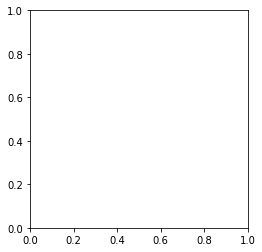

In [45]:
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pdf
import pandas as pd
import seaborn as sns

# Assuming you have the necessary dataframes and variables defined

def save_plot_to_pdf(figure, filename):
    with pdf.PdfPages(filename) as pdf_pages:
        pdf_pages.savefig(figure)

x = input("Enter the option you want:\n1. The shipping address differs from the billing address\n2. Multiple orders of the same item.\n3. Unusually large orders.\n4. Multiple orders to the same address with different payment method.\n5. Unexpected international orders.\n6. Generate pdf and csv file\n")

if x == "1":
    plt.pie(data, labels=labels, autopct='%1.0f')
    plt.title("Distribution of possible fake and real order based on the billing and shipping address")
    save_plot_to_pdf(plt.gcf(), 'Distribution of possible fake and real order.pdf')
    plt.savefig('Distribution of possible fake and real order.png')
    df_plots['Plot'] = ['Distribution of possible fake and real order.png']
    plt.show()
    plt.close()
    
elif x == '2':
    sns.barplot(y=multiple_orders[multiple_orders['Count'] > 30]['LineItem Name'], x=multiple_orders['Count'])
    plt.yticks(fontsize=7)
    plt.title("Items ordered more than 30 times")
    save_plot_to_pdf(plt.gcf(), 'Items ordered more than 30 times.pdf')
    plt.savefig('Items ordered more than 30 times.png')
    df_plots['Plot'] = ['Items ordered more than 30 times.png']
    plt.show()
    plt.close()

elif x == '3':
    # Option 3: Unusually large orders
    print(orders[orders['LineItem Qty'] > 10]['LineItem Name'])
    patches, texts = plt.pie(data)
    plt.legend(patches, label, bbox_to_anchor=(0.9, 1), loc="upper left")
    plt.title("The distribution of sales in which more than 10 items have been bought at once")
    save_plot_to_pdf(plt.gcf(), 'Unusually large orders.pdf')
    plt.close()  # Remove plt.show() since you've already saved the plot

elif x == '4':
    # Option 4: Multiple orders to the same address with different payment method
    plt.title("Shipping Address for multiple Orders with different payment methods")
    plt.pie(grouped_data_greaterthan1['Shipping Street Address'].value_counts(), labels=grouped_data_greaterthan1['Shipping Street Address'])
    save_plot_to_pdf(plt.gcf(), 'Shipping Address for multiple Orders with different payment methods.pdf')
    plt.savefig('Shipping Address for multiple Orders with different payment methods.png')
    df_plots['Plot'] = ['Shipping Address for multiple Orders with different payment methods.png']
    plt.close()  # Remove plt.show() since you've already saved the plot

    plt.title("Shipping Address which have more than 1 payment methods for multiple orders")
    sns.countplot(grouped_data['Count'])
    save_plot_to_pdf(plt.gcf(), 'Shipping Address which have more than 1 payment methods for multiple orders.pdf')
    plt.savefig('Shipping Address which have more than 1 payment methods for multiple orders.png')
    df_plots['Plot'] = ['Shipping Address which have more than 1 payment methods for multiple orders.png']
    plt.close()  # Remove plt.show() since you've already saved the plot

elif x == '5':
    # Option 5: Unexpected international orders
    orders['Shipping State'].unique()
    plt.title("Country Distribution")
    plt.pie(orders['Country'].value_counts(), labels=orders['Country'].unique())
    save_plot_to_pdf(plt.gcf(), 'Country Distribution.pdf')
    plt.savefig('Country Distribution.png')
    df_plots['Plot'] = ['Country Distribution.png']
    plt.close()  # Remove plt.show() since you've already saved the plot
    print("There are no International Orders")


# Option 6 - Generate PDF and CSV files
elif x == '6':
    # Save the plots to PDF first
    plt.pie(data, labels=labels, autopct='%1.0f')
    plt.title("Distribution of possible fake and real order based on the billing and shipping address")
    save_plot_to_pdf(plt.gcf(), 'Distribution of possible fake and real order.pdf')
    plt.savefig('Distribution of possible fake and real order.png')
    df_plots['Plot'] = ['Distribution of possible fake and real order.png']
    plt.show()
    plt.close()

    sns.barplot(y=multiple_orders[multiple_orders['Count'] > 30]['LineItem Name'], x=multiple_orders['Count'])
    plt.yticks(fontsize=7)
    plt.title("Items ordered more than 30 times")
    save_plot_to_pdf(plt.gcf(), 'Items ordered more than 30 times.pdf')
    plt.savefig('Items ordered more than 30 times.png')
    df_plots['Plot'] = ['Items ordered more than 30 times.png']
    plt.show()
    plt.close()

    

else:
    print("Invalid option. Please choose a valid option.")


In [36]:
import os
from PyPDF2 import PdfWriter, PdfReader
from PIL import Image

# Directory containing the PNG files
directory = "C:/Users/VICTUS/Desktop/Yoshop/Task_3"

# Output PDF file name
output_pdf = "Analysis.pdf"

# Create a PDF writer object
pdf_writer = PdfWriter()

# Get the list of PNG files in the directory
png_files = [f for f in os.listdir(directory) if f.endswith(".png")]

# Sort the PNG files by name (optional)
png_files.sort()

# Loop through the PNG files and add them to the PDF writer
for png_file in png_files:
    # Open the PNG file using PIL
    image = Image.open(os.path.join(directory, png_file))

    # Convert the image to RGB mode if it is in RGBA mode
    if image.mode == "RGBA":
        image = image.convert("RGB")

    # Convert the image to PDF format
    pdf_file = os.path.splitext(png_file)[0] + ".pdf"
    image.save(pdf_file, "PDF")
# Add the PDF file to the PDF writer
    with open(pdf_file, "rb") as f:
        pdf_reader = PdfReader(f)
        for page in pdf_reader.pages:
            pdf_writer.add_page(page)

    # Delete the temporary PDF file
    os.remove(pdf_file)

# Save the combined PDF file
with open(output_pdf, "wb") as f:
    pdf_writer.write(f)

print(f"Combined PDF file saved as {output_pdf}.")

Combined PDF file saved as Analysis.pdf.


In [29]:
!pip install PyPDF2

